**<h1>Import libraries</h1>**

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

**<h2>Download file contents onto a pandas dataframe</h2>**
To do it faster, we are going to upload the data previously onto google drive, then with the following code we mount a drive access and with read_csv extract our training data into a pandas dataframe.

*Consideration: The file must be uploaded on a sub-directory called "data" inside the directory of the current notebook*

In [ ]:
#metodo 1: descargar datos desde Kaggle
os.environ['KAGGLE_CONFIG_DIR']='.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20241
!unzip "udea-ai4eng-20241.zip"
!rm udea-ai4eng-20241.zip test.csv



 80% 17.0M/21.2M [00:00<00:00, 80.0MB/s]
100% 21.2M/21.2M [00:00<00:00, 89.0MB/s]
Archive:  udea-ai4eng-20241.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
#metodo 2: descargar desde carpeta drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
# con el drive seria : '/content/drive/MyDrive/ProyectoModelos1/data/train.csv'
# nota: para importar desde drive se debe almacenar el .csv en tu propio drive y editar la dirección al archivo con el
# propio tuyo. todos empiezan /content/drive/MyDrive/
# desde kaggle train_df = pd.read_csv('train.csv')
train_df = pd.read_csv('train.csv')
train_df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,No,N,Si,Si,No,Primaria completa,bajo


**<h1>Análisis exploratorio de datos</h1>**

<h2>Información general del dataframe:</h2> Cantidad de entradas, entradas not null por columna, sus nombres y tipo de datos

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_TIENELAVADORA              652727 non-null  object
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object
 12  ESTU_PAGOMATRICULAPROPIO      

<h3>Cantidad de estudiantes por cada combinación de rendimiento global y estrato de vivienda</h3>

In [ ]:
# Cantidad de estudiantes por cada combinación de rendimiento global y estrato de vivienda

agrupado = train_df[['RENDIMIENTO_GLOBAL','FAMI_ESTRATOVIVIENDA']].groupby(['RENDIMIENTO_GLOBAL','FAMI_ESTRATOVIVIENDA']).size()
agrupado = agrupado.rename("Cantidad de estudiantes")

df = pd.DataFrame(agrupado)
df

Cantidad de estudiantes
RENDIMIENTO_GLOBAL FAMI_ESTRATOVIVIENDA                         
alto               Estrato 1                               14363
                   Estrato 2                               45948
                   Estrato 3                               59121
                   Estrato 4                               28624
                   Estrato 5                               12415
                   Estrato 6                                7648
                   Sin Estrato                               588
bajo               Estrato 1                               42388
                   Estrato 2                               63068
                   Estrato 3                               42756
                   Estrato 4                                9064
                   Estrato 5                                2731
                   Estrato 6                                1287
                   Sin Estrato                              1436
medio-alto         Estrato 1                               23643
                   Estrato 2                               59536
                   Estrato 3                               56841
                   Estrato 4                               16154
                   Estrato 5                                5112
                   Estrato 6                                2314
                   Sin Estrato                               579
medio-bajo         Estrato 1                               31597
                   Estrato 2                               64119
                   Estrato 3                               51967
                   Estrato 4                               11672
                   Estrato 5                                3350
                   Estrato 6                                1356
                   Sin Estrato                               686

In [ ]:
# Datos más comunes para Periodo y estrato de cada Rendimiento global


agrupado = train_df[['RENDIMIENTO_GLOBAL','PERIODO','FAMI_ESTRATOVIVIENDA']].groupby(['RENDIMIENTO_GLOBAL']).agg(lambda x: x.mode().iloc[0])
# Agrupo por rendimiento y hallo el valor mas común para estos grupos, ej: para el rendimiento alto el periodo mas común es 20203 y el estrato 3,
# pero esto no significa que sea la combinación que más se repite, sino que de manera individual es cada uno el más común en su respectiva columna

#agrupado = agrupado.rename("Cantidad de estudiantes")

df = pd.DataFrame(agrupado)

df

,PERIODO,FAMI_ESTRATOVIVIENDA
RENDIMIENTO_GLOBAL,,
alto,20203,Estrato 3
bajo,20212,Estrato 2
medio-alto,20195,Estrato 2
medio-bajo,20195,Estrato 2


<h3>CANTIDAD DE ESTUDIANTES POR PROGRAMA ACADEMICO</h3>
<p>Sólo se muestran los datos para los primeros 15 programas en cantidad de estudiantes</p>

ESTU_PRGM_ACADEMICO
DERECHO                                53244
ADMINISTRACION DE EMPRESAS             51902
CONTADURIA PUBLICA                     39664
PSICOLOGIA                             31932
INGENIERIA INDUSTRIAL                  28481
ADMINISTRACIÓN DE EMPRESAS             24777
INGENIERIA CIVIL                       19487
MEDICINA                               18099
PSICOLOGÍA                             17377
INGENIERIA DE SISTEMAS                 17150
TRABAJO SOCIAL                         12686
ENFERMERIA                             11635
ARQUITECTURA                           11469
ADMINISTRACIÓN EN SALUD OCUPACIONAL    11018
CONTADURÍA PÚBLICA                     10912
dtype: int64


<Axes: xlabel='ESTU_PRGM_ACADEMICO', ylabel='cantidad estudiantes'>

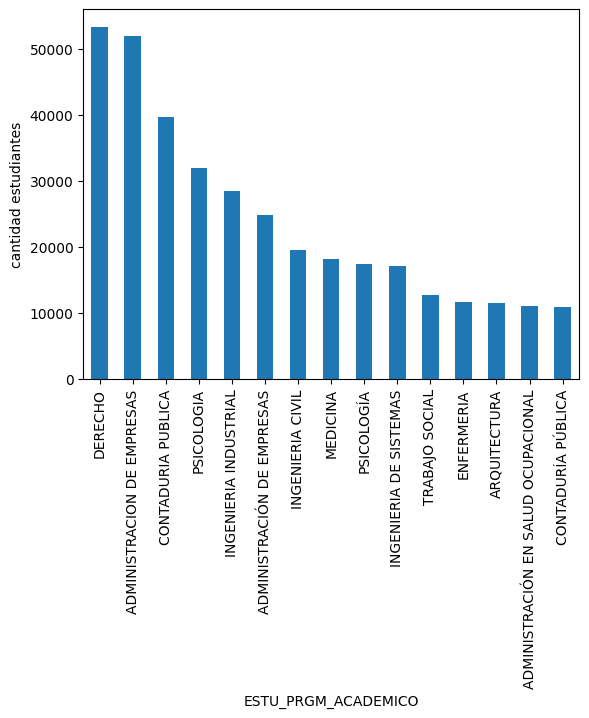

In [ ]:
agrupado = train_df[['ESTU_PRGM_ACADEMICO']].groupby(['ESTU_PRGM_ACADEMICO']).size()
df = pd.DataFrame(agrupado)
top_n = 15

# Sort the groups by size and select top n
top = agrupado.sort_values(ascending=False).head(top_n)
print(top)
# df.nlargest(top_n,'RENDIMIENTO_GLOBAL')
top.plot(kind="bar",ylabel="cantidad estudiantes")

<h3>Programas académicos más comunes para cada rendimiento</h3>

In [ ]:
agrupado = train_df[['RENDIMIENTO_GLOBAL','ESTU_PRGM_ACADEMICO']].groupby(['RENDIMIENTO_GLOBAL']).agg(lambda x: x.mode().iloc[0])
df = pd.DataFrame(agrupado)
df

,ESTU_PRGM_ACADEMICO
RENDIMIENTO_GLOBAL,
alto,DERECHO
bajo,ADMINISTRACION DE EMPRESAS
medio-alto,DERECHO
medio-bajo,ADMINISTRACION DE EMPRESAS


<h3> Porcentaje de estudiantes que trabajan en un rango de horas agrupado por estrato socioeconomico.

In [ ]:
agrupado = train_df.groupby(['ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA']).size()
agrupado = agrupado.rename("Cantidad de estudiantes")

# Calcular el total de estudiantes
total_estudiantes = agrupado.sum()

# Calcular los porcentajes y crear un nuevo DataFrame
porcentajes = round((agrupado / total_estudiantes) * 100 , 2)
df_porcentajes = pd.DataFrame(porcentajes.rename("Porcentaje sobre el total"))
df_porcentajes

Porcentaje sobre el total
ESTU_HORASSEMANATRABAJA FAMI_ESTRATOVIVIENDA                           
0                       Estrato 1                                  2.93
                        Estrato 2                                  5.10
                        Estrato 3                                  5.27
                        Estrato 4                                  2.53
                        Estrato 5                                  1.09
                        Estrato 6                                  0.63
                        Sin Estrato                                0.08
Entre 11 y 20 horas     Estrato 1                                  3.46
                        Estrato 2                                  6.24
                        Estrato 3                                  5.27
                        Estrato 4                                  1.62
                        Estrato 5                                  0.55
                        Estrato 6                                  0.27
                        Sin Estrato                                0.10
Entre 21 y 30 horas     Estrato 1                                  2.44
                        Estrato 2                                  4.97
                        Estrato 3                                  4.46
                        Estrato 4                                  1.34
                        Estrato 5                                  0.47
                        Estrato 6                                  0.25
                        Sin Estrato                                0.07
Menos de 10 horas       Estrato 1                                  2.82
                        Estrato 2                                  4.53
                        Estrato 3                                  3.71
                        Estrato 4                                  1.27
                        Estrato 5                                  0.49
                        Estrato 6                                  0.26
                        Sin Estrato                                0.09
Más de 30 horas         Estrato 1                                  5.27
                        Estrato 2                                 14.39
                        Estrato 3                                 13.21
                        Estrato 4                                  3.17
                        Estrato 5                                  0.99
                        Estrato 6                                  0.51
                        Sin Estrato                                0.15

In [ ]:
#////////////////////////////////////////////////


**total de datos y conteo de columnas**




In [ ]:
#consultamos el numero de filas
total_filas = train_df.shape[0]

# Formatear el número con puntos como separadores de miles y coma como separador decimal
total_filas_formateado = "{:,}".format(total_filas).replace(",", ".")

print("El DataFrame tiene {} filas.".format(total_filas_formateado))

El DataFrame tiene 692.500 filas.


In [ ]:
#cuantos datos hay en total
total_datos = train_df.shape[0] * train_df.shape[1]

#cuantos NaN hay en el train_df
print("El DataFrame tiene un total de {} datos.".format(total_datos))
total_nans = train_df.isna().sum().sum()

print("El DataFrame tiene un total de {} valores NaN.".format(total_nans))

#que porcentaje de NaN hay en el total de datos
total_datos = train_df.size
total_nans = train_df.isna().sum().sum()

porcentaje_nans = (total_nans / total_datos) * 100

"El {:.2f}% de los datos en el DataFrame son NaN.".format(porcentaje_nans)

El DataFrame tiene un total de 11772500 datos.
El DataFrame tiene un total de 297378 valores NaN.


'El 2.53% de los datos en el DataFrame son NaN.'

In [ ]:
conteo_departamentos = train_df['ESTU_PRGM_DEPARTAMENTO'].value_counts()


print("Número de datos por departamento:")
conteo_departamentos

Número de datos por departamento:


BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: ESTU_PRGM_DEPARTAMENTO, dtype: int64

In [ ]:
# Imprimir el conteo de datos por rendimiento global
conteo_rendimiento_global = train_df['RENDIMIENTO_GLOBAL'].value_counts()
# Imprimir el conteo de datos por rendimiento global
print("Número de datos por rendimiento global:")
conteo_rendimiento_global

Número de datos por rendimiento global:


alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: RENDIMIENTO_GLOBAL, dtype: int64

In [ ]:
# Imprimir el conteo de datos por periodo
conteo_periodo = train_df['PERIODO'].value_counts()


print("Número de datos por periodo:")
conteo_periodo

Número de datos por periodo:


20195    180873
20203    171838
20212    171412
20183    164818
20194      1472
20213      1178
20202       490
20184       254
20196       165
Name: PERIODO, dtype: int64

In [ ]:
# Imprimir el conteo de datos por estado de estar privado de libertad
conteo_privado_libertad = train_df['ESTU_PRIVADO_LIBERTAD'].value_counts()
print("Número de datos por estado de estar privado de libertad:")
print(conteo_privado_libertad)

Número de datos por estado de estar privado de libertad:
N    692466
S        34
Name: ESTU_PRIVADO_LIBERTAD, dtype: int64


In [ ]:
# Imprimir el conteo de cada valor de matrícula universitaria
conteo_valores_matricula = train_df['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts()
print("Conteo de valores de matrícula universitaria:")
conteo_valores_matricula

Conteo de valores de matrícula universitaria:


Entre 1 millón y menos de 2.5 millones      204048
Entre 2.5 millones y menos de 4 millones    127430
Menos de 500 mil                             80263
Entre 500 mil y menos de 1 millón            78704
Entre 4 millones y menos de 5.5 millones     69736
Más de 7 millones                            68014
Entre 5.5 millones y menos de 7 millones     38490
No pagó matrícula                            19528
Name: ESTU_VALORMATRICULAUNIVERSIDAD, dtype: int64

In [ ]:
#EDUCACION DE MADRE EN PORCENTAJES
# Obtener el conteo de cada valor único en la columna 'FAMI_EDUCACIONMADRE'
conteo_fami_educacion_madre = train_df['FAMI_EDUCACIONMADRE'].value_counts()


# Calcular el porcentaje de cada valor
porcentaje_fami_educacion_madre = (conteo_fami_educacion_madre / len(train_df['FAMI_EDUCACIONMADRE'])) * 100

print(porcentaje_fami_educacion_madre)

Secundaria (Bachillerato) completa      20.468448
Primaria incompleta                     14.356679
Técnica o tecnológica completa          12.930253
Educación profesional completa          12.321444
Secundaria (Bachillerato) incompleta    11.698484
Primaria completa                        8.104693
Postgrado                                6.678123
Técnica o tecnológica incompleta         3.975884
Educación profesional incompleta         3.244765
Ninguno                                  2.091408
No sabe                                  0.435668
No Aplica                                0.276968
Name: FAMI_EDUCACIONMADRE, dtype: float64


In [ ]:
#cuantas persona de puntuacion alta son de estrato 6, 4, 3, 2, 1

In [ ]:
#EDUCACION DE PADRE DE PADRES EN PORCENTAJES
# Obtener el conteo de cada valor único en la columna 'FAMI_EDUCACIONPADRE'
conteo_fami_educacion_padre = train_df['FAMI_EDUCACIONPADRE'].value_counts()


# Calcular el porcentaje de cada valor
porcentaje_fami_educacion_padre = (conteo_fami_educacion_padre / len(train_df['FAMI_EDUCACIONPADRE'])) * 100

# Redondear el porcentaje a 4 cifras decimales
porcentaje_fami_educacion_padre = porcentaje_fami_educacion_padre.round(4)

print(porcentaje_fami_educacion_padre)

Secundaria (Bachillerato) completa      18.5255
Primaria incompleta                     18.1480
Educación profesional completa          12.0025
Secundaria (Bachillerato) incompleta    10.3471
Técnica o tecnológica completa           9.0968
Primaria completa                        8.0806
Postgrado                                6.3782
Educación profesional incompleta         3.9110
Técnica o tecnológica incompleta         3.2566
Ninguno                                  3.1781
No sabe                                  2.3960
No Aplica                                1.3327
Name: FAMI_EDUCACIONPADRE, dtype: float64
